In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import joblib
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/HR_Attrition_dataset.csv')

In [ ]:
df

,Employee_ID,Age,Attrition,Business_Travel,Department,Distance_From_Home,Education,Environment_Satisfaction,Gender,Salary,...,Job_Satisfaction,Marital_Status,Number_of_Companies_Worked_previously,Overtime,Salary_Hike_in_percent,Total_working_years_experience,Work_life_balance,No_of_years_worked_at_current_company,No_of_years_in_current_role,Years_since_last_promotion
0,1,56,Yes,Travel Rarely,Network Administration,24,Graduation,5,Male,186630,...,4,Married,7,Yes,85,9,1,7,2,4
1,2,46,Yes,Travel Rarely,Software Development,45,Degree,5,Male,78553,...,2,Divorced,3,No,22,18,4,1,2,0
2,3,32,No,No Travel,Data Science,30,Master's,3,Female,175003,...,2,Single,2,Yes,100,0,4,5,5,8
3,4,60,Yes,Travel Frequently,Data Science,42,Graduation,2,Female,100795,...,3,Married,5,No,72,17,2,1,7,3
4,5,25,No,No Travel,Network Administration,26,Graduation,4,Female,75256,...,4,Single,9,No,21,12,5,7,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,33,Yes,Travel Frequently,Data Science,35,Degree,4,Male,108566,...,2,Single,5,No,68,2,2,1,4,4
9996,9997,62,No,Travel Rarely,Data Science,30,Degree,5,Female,115593,...,5,Married,3,Yes,55,4,1,0,1,2
9997,9998,32,No,Travel Rarely,Data Science,44,Degree,4,Female,160923,...,4,Divorced,1,No,87,12,5,8,0,1
9998,9999,18,Yes,Travel Rarely,Data Science,46,Graduation,2,Male,163365,...,4,Married,9,Yes,79,10,3,8,8,3


In [ ]:
df.head()

,Employee_ID,Age,Attrition,Business_Travel,Department,Distance_From_Home,Education,Environment_Satisfaction,Gender,Salary,...,Job_Satisfaction,Marital_Status,Number_of_Companies_Worked_previously,Overtime,Salary_Hike_in_percent,Total_working_years_experience,Work_life_balance,No_of_years_worked_at_current_company,No_of_years_in_current_role,Years_since_last_promotion
0,1,56,Yes,Travel Rarely,Network Administration,24,Graduation,5,Male,186630,...,4,Married,7,Yes,85,9,1,7,2,4
1,2,46,Yes,Travel Rarely,Software Development,45,Degree,5,Male,78553,...,2,Divorced,3,No,22,18,4,1,2,0
2,3,32,No,No Travel,Data Science,30,Master's,3,Female,175003,...,2,Single,2,Yes,100,0,4,5,5,8
3,4,60,Yes,Travel Frequently,Data Science,42,Graduation,2,Female,100795,...,3,Married,5,No,72,17,2,1,7,3
4,5,25,No,No Travel,Network Administration,26,Graduation,4,Female,75256,...,4,Single,9,No,21,12,5,7,2,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Employee_ID                            10000 non-null  int64 
 1   Age                                    10000 non-null  int64 
 2   Attrition                              10000 non-null  object
 3   Business_Travel                        10000 non-null  object
 4   Department                             10000 non-null  object
 5   Distance_From_Home                     10000 non-null  int64 
 6   Education                              10000 non-null  object
 7   Environment_Satisfaction               10000 non-null  int64 
 8   Gender                                 10000 non-null  object
 9   Salary                                 10000 non-null  int64 
 10  Job_Involvement                        10000 non-null  int64 
 11  Job_Level       

In [ ]:
df.shape

(10000, 23)

In [ ]:
df.describe(include='all')

,Employee_ID,Age,Attrition,Business_Travel,Department,Distance_From_Home,Education,Environment_Satisfaction,Gender,Salary,...,Job_Satisfaction,Marital_Status,Number_of_Companies_Worked_previously,Overtime,Salary_Hike_in_percent,Total_working_years_experience,Work_life_balance,No_of_years_worked_at_current_company,No_of_years_in_current_role,Years_since_last_promotion
count,10000.00000,10000.000000,10000,10000,10000,10000.000000,10000,10000.000000,10000,10000.000000,...,10000.000000,10000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,3,5,NaN,5,NaN,2,NaN,...,NaN,3,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,No,Travel Rarely,Cyber Security,NaN,Graduation,NaN,Female,NaN,...,NaN,Married,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,7753,5988,2080,NaN,3066,NaN,5027,NaN,...,NaN,3391,NaN,6949,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,40.494900,NaN,NaN,NaN,25.445100,NaN,2.987800,NaN,114492.519000,...,2.991900,NaN,5.009800,NaN,50.148600,9.978800,3.003600,4.978000,5.003500,3.985400
std,2886.89568,13.162298,NaN,NaN,NaN,14.390431,NaN,1.414939,NaN,49009.843725,...,1.427178,NaN,3.166371,NaN,29.154528,6.110686,1.412865,3.177849,3.148187,2.587944
min,1.00000,18.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,30078.000000,...,1.000000,NaN,0.000000,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2500.75000,29.000000,NaN,NaN,NaN,13.000000,NaN,2.000000,NaN,72124.000000,...,2.000000,NaN,2.000000,NaN,25.000000,5.000000,2.000000,2.000000,2.000000,2.000000
50%,5000.50000,40.000000,NaN,NaN,NaN,25.000000,NaN,3.000000,NaN,114499.000000,...,3.000000,NaN,5.000000,NaN,51.000000,10.000000,3.000000,5.000000,5.000000,4.000000
75%,7500.25000,52.000000,NaN,NaN,NaN,38.000000,NaN,4.000000,NaN,157213.000000,...,4.000000,NaN,8.000000,NaN,75.000000,15.000000,4.000000,8.000000,8.000000,6.000000


In [ ]:
df.isna().sum()

,0
Employee_ID,0
Age,0
Attrition,0
Business_Travel,0
Department,0
Distance_From_Home,0
Education,0
Environment_Satisfaction,0
Gender,0
Salary,0


In [ ]:
(df == 0).sum()


,0
Employee_ID,0
Age,0
Attrition,0
Business_Travel,0
Department,0
Distance_From_Home,0
Education,0
Environment_Satisfaction,0
Gender,0
Salary,0


In [ ]:
df['Attrition'].value_counts()

,count
Attrition,
No,7753
Yes,2247


In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category'])


for col in cat_cols:
    print(f"Value counts for column: {col}")
    print(cat_cols[col].value_counts())
    print('-' * 30)

Value counts for column: Attrition
Attrition
No     7753
Yes    2247
Name: count, dtype: int64
------------------------------
Value counts for column: Business_Travel
Business_Travel
Travel Rarely        5988
Travel Frequently    2014
No Travel            1998
Name: count, dtype: int64
------------------------------
Value counts for column: Department
Department
Cyber Security            2080
Software Development      2065
IT Services               1957
Data Science              1955
Network Administration    1943
Name: count, dtype: int64
------------------------------
Value counts for column: Education
Education
Graduation       3066
Degree           2994
Master's         1987
PhD               978
Below College     975
Name: count, dtype: int64
------------------------------
Value counts for column: Gender
Gender
Female    5027
Male      4973
Name: count, dtype: int64
------------------------------
Value counts for column: Job_Role
Job_Role
IT                   880
QA Analyst       

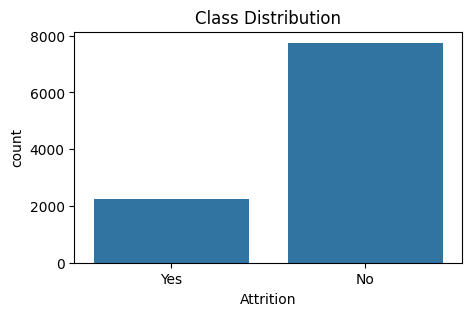

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='Attrition')
plt.title("Class Distribution")
plt.show()

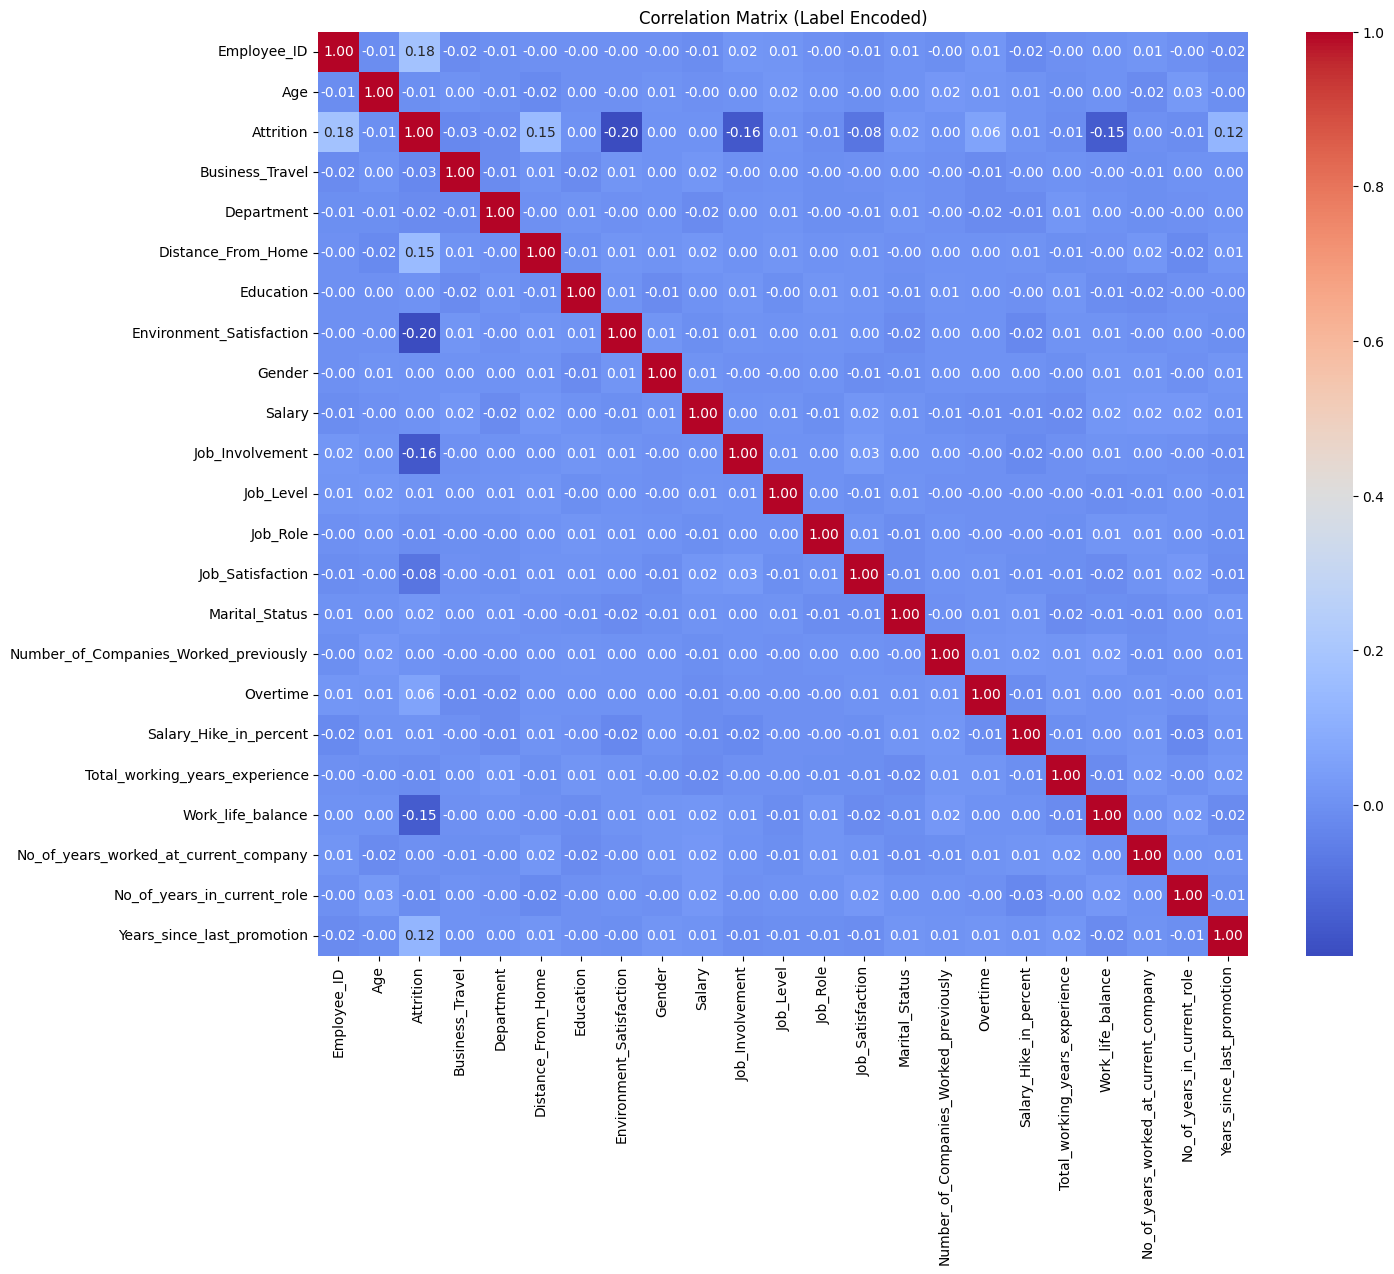

In [ ]:
df_corr = df.copy()
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col])

plt.figure(figsize=(15, 12))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Label Encoded)")
plt.show()

In [ ]:
target_corr = df_corr.corr()["Attrition"].drop("Attrition")
top_corr_with_target = target_corr.abs().sort_values(ascending=False).head(10)

print("\n🔹 Top 10 features most correlated with Attrition:")
print(top_corr_with_target)




🔹 Top 10 features most correlated with Attrition:
Environment_Satisfaction      0.195512
Employee_ID                   0.181573
Job_Involvement               0.161004
Distance_From_Home            0.150030
Work_life_balance             0.149927
Years_since_last_promotion    0.123488
Job_Satisfaction              0.082565
Overtime                      0.058506
Business_Travel               0.026832
Department                    0.017506
Name: Attrition, dtype: float64


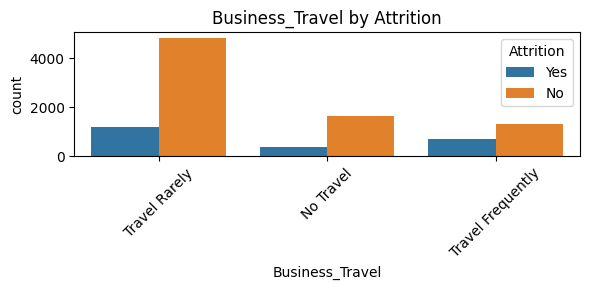

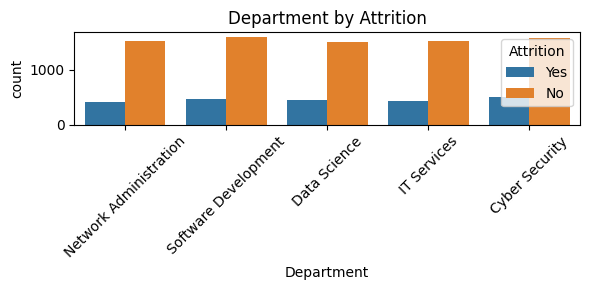

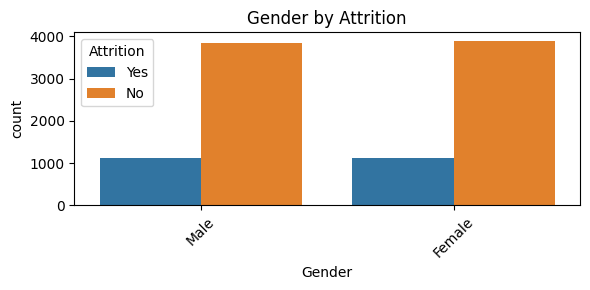

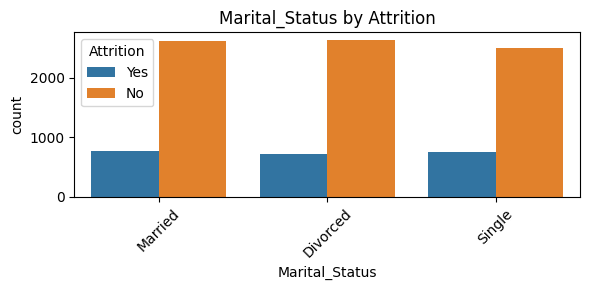

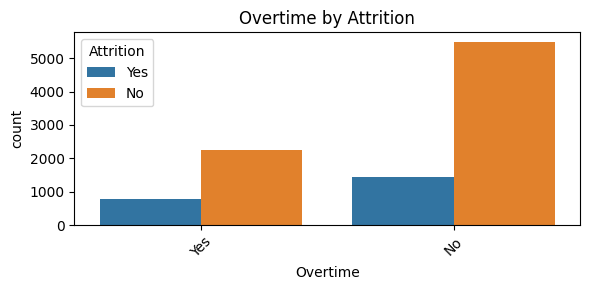

In [ ]:
cat_cols = ['Business_Travel', 'Department', 'Gender', 'Marital_Status', 'Overtime']
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, hue='Attrition')
    plt.title(f"{col} by Attrition")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-1105-4111641698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='Salary', data=df, palette='Set2')


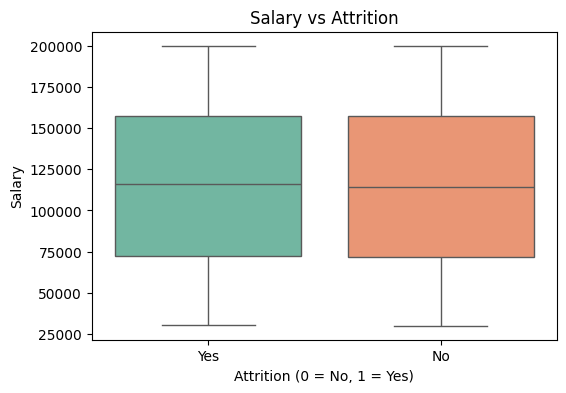

In [ ]:


plt.figure(figsize=(6, 4))
sns.boxplot(x='Attrition', y='Salary', data=df, palette='Set2')
plt.title("Salary vs Attrition")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Salary")
plt.show()


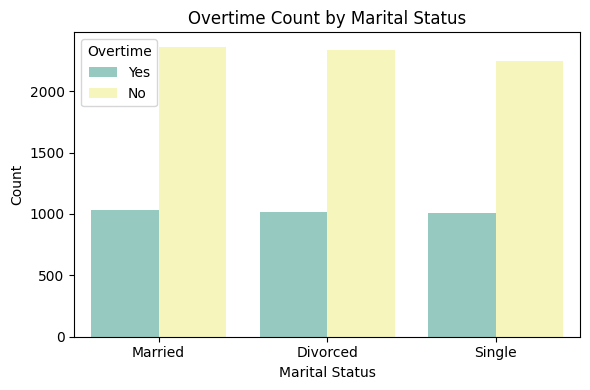

In [ ]:


plt.figure(figsize=(6, 4))
sns.countplot(x='Marital_Status', hue='Overtime', data=df, palette='Set3')
plt.title("Overtime Count by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title='Overtime')
plt.tight_layout()
plt.show()


In [ ]:
df.drop("Employee_ID", axis=1, inplace=True)

In [ ]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [ ]:
def detect_selected_outliers_iqr_with_boxplots(df, columns=['Age', 'Salary', 'Salary_Hike_in_percent'], factor=1.5):
    outlier_counts = {}

    print("\nNumber of Outliers in Selected Features:")
    for col in columns:
        if col not in df.columns:
            print(f"{col} not found in DataFrame.")
            continue

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        outlier_counts[col] = outlier_count
        print(f"{col}: {outlier_count} outliers")

        plt.figure(figsize=(6, 1.5))
        sns.boxplot(x=df[col], color='lightblue')
        plt.title(f"Boxplot: {col}")
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()

    return outlier_counts






Number of Outliers in Selected Features:
Age: 0 outliers


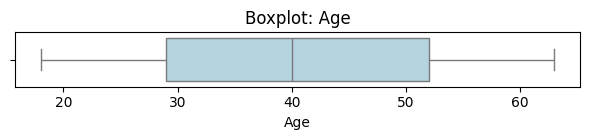

Salary: 0 outliers


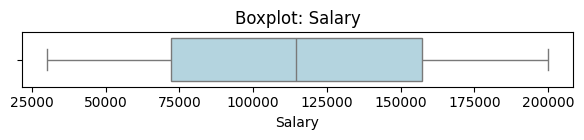

Salary_Hike_in_percent: 0 outliers


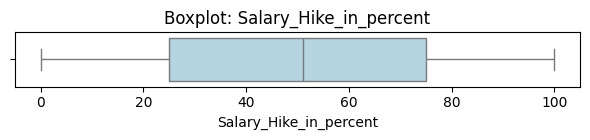

{'Age': 0, 'Salary': 0, 'Salary_Hike_in_percent': 0}

In [ ]:
detect_selected_outliers_iqr_with_boxplots(df)



In [ ]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]


In [ ]:
#final 20
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
#20 valid
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

In [ ]:

label_encoders = {}
for col in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_val[col] = le.transform(X_val[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score


def evaluate_model(name, model, X_train, y_train, X_val, y_val, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"\n{name} Performance:")
    print(f" Training Accuracy:  {train_acc:.4f}")
    print(f"   Validation Accuracy: {val_acc:.4f}")
    print(f"   Test Accuracy:       {test_acc:.4f}")

    print("\n Validation Classification Report:")
    print(classification_report(y_val, y_val_pred, target_names=["No", "Yes"]))

    print(" Test Classification Report:")
    print(classification_report(y_test, y_test_pred, target_names=["No", "Yes"]))

    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix (Validation): {name}")
    plt.show()

    return model



Logistic Regression Performance:
 Training Accuracy:  0.8065
   Validation Accuracy: 0.7910
   Test Accuracy:       0.8045

 Validation Classification Report:
              precision    recall  f1-score   support

          No       0.81      0.96      0.88      1551
         Yes       0.60      0.21      0.31       449

    accuracy                           0.79      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.76      0.79      0.75      2000

 Test Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.97      0.88      1551
         Yes       0.68      0.24      0.36       449

    accuracy                           0.80      2000
   macro avg       0.75      0.60      0.62      2000
weighted avg       0.79      0.80      0.77      2000



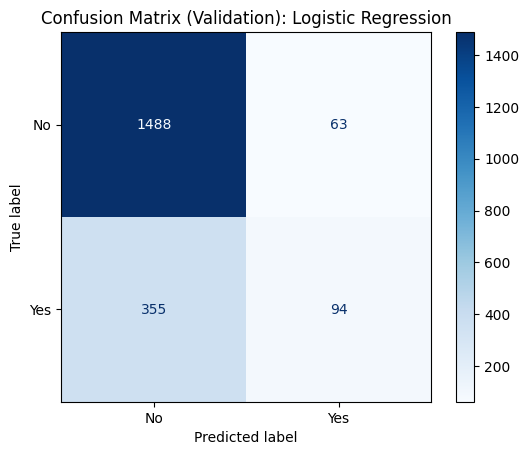

LogisticRegression()

In [ ]:
#logistic
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
evaluate_model("Logistic Regression", lr,X_train_scaled, y_train,  X_val_scaled, y_val, X_test_scaled, y_test)


Decision Tree Performance:
 Training Accuracy:  1.0000
   Validation Accuracy: 0.7925
   Test Accuracy:       0.7935

 Validation Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.86      0.86      1551
         Yes       0.54      0.57      0.55       449

    accuracy                           0.79      2000
   macro avg       0.70      0.72      0.71      2000
weighted avg       0.80      0.79      0.80      2000

 Test Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.86      0.87      1551
         Yes       0.54      0.57      0.55       449

    accuracy                           0.79      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.80      0.79      0.80      2000



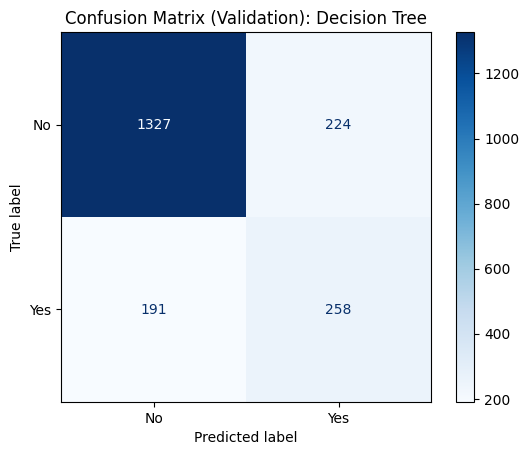

DecisionTreeClassifier()

In [ ]:
#decision
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
evaluate_model("Decision Tree", dt, X_train, y_train, X_val, y_val, X_test, y_test)


Random Forest Performance:
 Training Accuracy:  1.0000
   Validation Accuracy: 0.8470
   Test Accuracy:       0.8535

 Validation Classification Report:
              precision    recall  f1-score   support

          No       0.84      1.00      0.91      1551
         Yes       0.96      0.33      0.49       449

    accuracy                           0.85      2000
   macro avg       0.90      0.66      0.70      2000
weighted avg       0.87      0.85      0.82      2000

 Test Classification Report:
              precision    recall  f1-score   support

          No       0.84      1.00      0.91      1551
         Yes       0.97      0.36      0.52       449

    accuracy                           0.85      2000
   macro avg       0.91      0.68      0.72      2000
weighted avg       0.87      0.85      0.83      2000



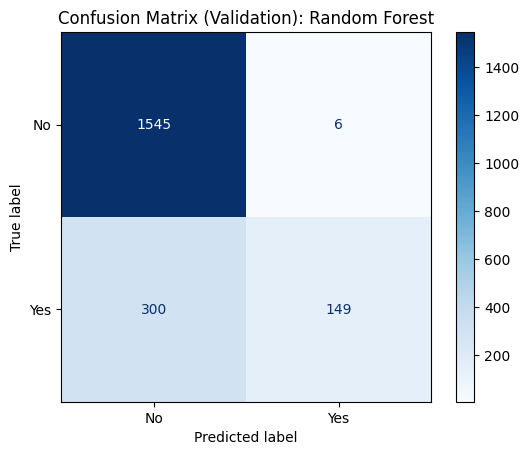

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# random
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
evaluate_model("Random Forest", rf, X_train, y_train, X_val, y_val, X_test, y_test)


Gradient Boosting Performance:
 Training Accuracy:  0.8808
   Validation Accuracy: 0.8655
   Test Accuracy:       0.8740

 Validation Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.99      0.92      1551
         Yes       0.92      0.44      0.59       449

    accuracy                           0.87      2000
   macro avg       0.89      0.71      0.76      2000
weighted avg       0.87      0.87      0.85      2000

 Test Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.99      0.92      1551
         Yes       0.94      0.47      0.62       449

    accuracy                           0.87      2000
   macro avg       0.90      0.73      0.77      2000
weighted avg       0.88      0.87      0.86      2000



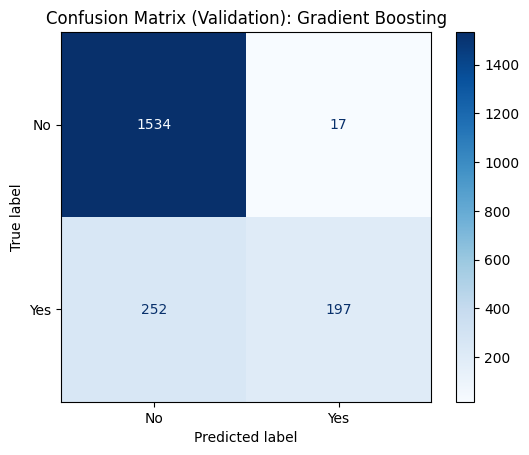

GradientBoostingClassifier(random_state=42)

In [ ]:
#gradientboost
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
evaluate_model("Gradient Boosting", gb,X_train_scaled, y_train,  X_val_scaled, y_val, X_test_scaled, y_test)


Naive Bayes Performance:
 Training Accuracy:  0.8110
   Validation Accuracy: 0.8020
   Test Accuracy:       0.8100

 Validation Classification Report:
              precision    recall  f1-score   support

          No       0.81      0.98      0.88      1551
         Yes       0.72      0.19      0.31       449

    accuracy                           0.80      2000
   macro avg       0.76      0.59      0.59      2000
weighted avg       0.79      0.80      0.75      2000

 Test Classification Report:
              precision    recall  f1-score   support

          No       0.81      0.98      0.89      1551
         Yes       0.74      0.23      0.36       449

    accuracy                           0.81      2000
   macro avg       0.78      0.61      0.62      2000
weighted avg       0.80      0.81      0.77      2000



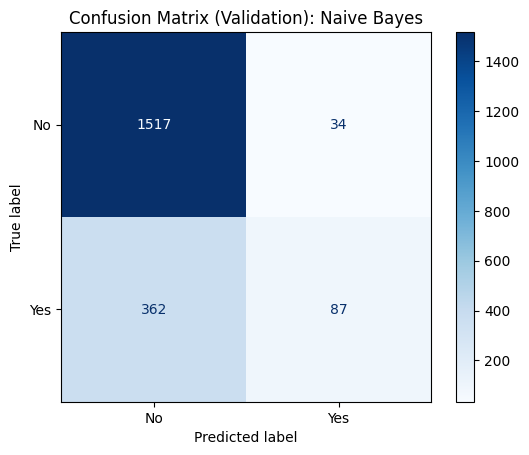

GaussianNB()

In [ ]:

# naive
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
evaluate_model("Naive Bayes", nb,X_train_scaled, y_train,  X_val_scaled, y_val, X_test_scaled, y_test)



In [ ]:
##best model
joblib.dump(gb, "best_gradient_boosting_model.pkl")



['best_gradient_boosting_model.pkl']

In [ ]:
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")


['label_encoders.pkl']